In [1]:
import sys
import os

# Get the absolute path of parent folder
current_dir = os.path.abspath("")
parent_dir = os.path.join(current_dir, os.pardir)

# Add to sys.path
sys.path.append(parent_dir)

In [2]:
import ml_combat as ml
from ml_combat import data
from ml_combat.MetaModel import MetaModel
from sklearn.linear_model import LinearRegression

In [3]:
from prophet import Prophet
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = ml.data.get_training_flattened()
df['total_rad_1h:J'] = df['diffuse_rad_1h:J'] + df['direct_rad_1h:J']
df = df[df.location == "A"].copy()
df.dropna('index', subset=['total_rad_1h:J', 'y'], inplace=True)

/var/folders/rn/zrxftcb56xg254wsfbhrtbt80000gn/T/ipykernel_23332/509686405.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna('index', subset=['total_rad_1h:J', 'y'], inplace=True)


In [6]:
df.corr().y.sort_values(ascending=False)

/var/folders/rn/zrxftcb56xg254wsfbhrtbt80000gn/T/ipykernel_23332/2596964434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().y.sort_values(ascending=False)


y                                 1.000000
total_rad_1h:J                    0.890886
direct_rad:W                      0.867413
direct_rad_1h:J                   0.853149
clear_sky_rad:W                   0.811664
clear_sky_energy_1h:J             0.798949
diffuse_rad:W                     0.708496
diffuse_rad_1h:J                  0.701035
sun_elevation:d                   0.688040
is_day:idx                        0.556254
t_1000hPa:K                       0.348635
dew_point_2m:K                    0.247368
visibility:m                      0.245593
absolute_humidity_2m:gm3          0.237477
pressure_100m:hPa                 0.182554
msl_pressure:hPa                  0.182078
ceiling_height_agl:m              0.178709
pressure_50m:hPa                  0.177604
sfc_pressure:hPa                  0.172647
cloud_base_agl:m                  0.171281
wind_speed_w_1000hPa:ms          -0.005179
snow_melt_10min:mm               -0.010862
sun_azimuth:d                    -0.016277
prob_rime:p

<Axes: ylabel='Frequency'>

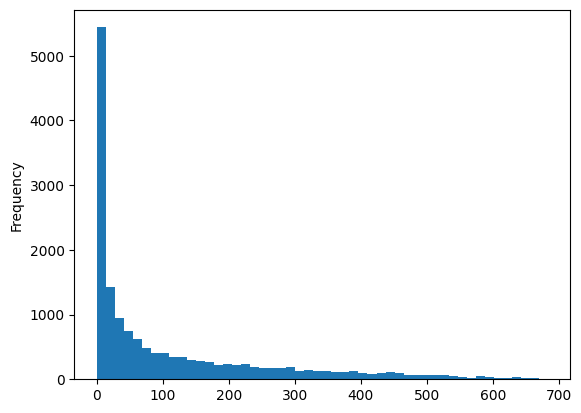

In [7]:
df[df['direct_rad:W'] !=0]['direct_rad:W'].plot(kind='hist', bins=50)

In [12]:
m = LinearRegression()
m.fit(df['total_rad_1h:J'].values.reshape(-1, 1), df['y'].values.reshape(-1, 1))
df['yhat_total_rad_1h:J'] = m.predict(df['total_rad_1h:J'].values.reshape(-1, 1))

<Axes: >

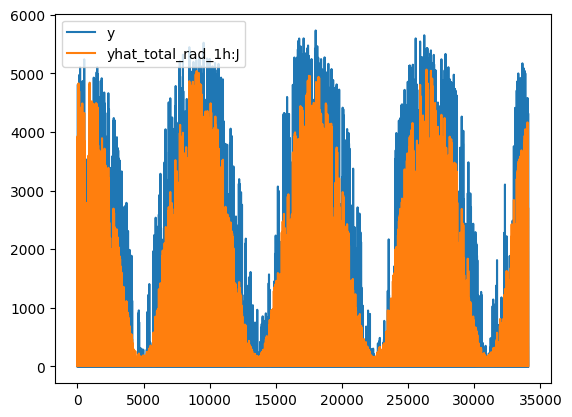

In [13]:
df[['y', 'yhat_total_rad_1h:J']].plot()

<Axes: ylabel='Frequency'>

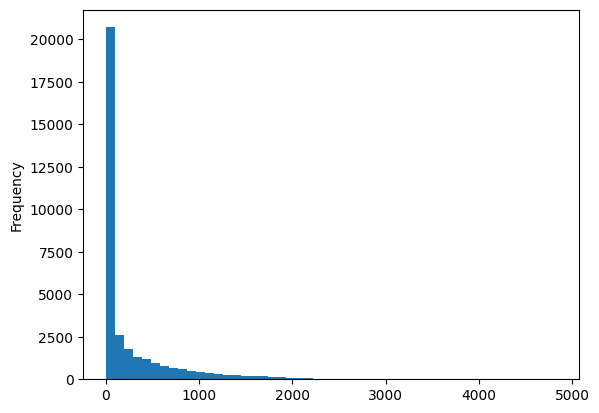

In [18]:
abs(df.y - df['yhat_total_rad_1h:J']).plot(kind='hist', bins=50)

In [22]:
df[abs(df.y - df['yhat_total_rad_1h:J'])>1000].corr()

/var/folders/rn/zrxftcb56xg254wsfbhrtbt80000gn/T/ipykernel_23332/3330130627.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[abs(df.y - df['yhat_total_rad_1h:J'])>1000].corr()


,y,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,total_rad_1h:J,yhat_total_rad_1h:J
y,1.000000,-0.097102,0.093890,0.020210,0.160053,0.233504,0.104131,NaN,-0.065568,-0.002947,...,-0.077880,-0.077613,-0.232818,0.123150,-0.201522,-0.170850,-0.012537,NaN,0.299146,0.299146
absolute_humidity_2m:gm3,-0.097102,1.000000,-0.821061,0.078753,0.385536,0.372225,0.039758,NaN,0.975357,0.256911,...,0.075439,0.875631,0.214396,0.019620,-0.125911,-0.044045,-0.125074,NaN,0.197884,0.197884
air_density_2m:kgm3,0.093890,-0.821061,1.000000,-0.180482,-0.464990,-0.428030,-0.146285,NaN,-0.834016,-0.283680,...,-0.012966,-0.944947,-0.203853,-0.220768,-0.000986,0.149573,-0.007034,NaN,-0.378596,-0.378596
ceiling_height_agl:m,0.020210,0.078753,-0.180482,1.000000,-0.088492,-0.098767,0.682858,NaN,0.062557,-0.163448,...,-0.284614,0.220824,0.007974,0.313107,-0.135086,-0.298222,0.034579,NaN,0.234838,0.234838
clear_sky_energy_1h:J,0.160053,0.385536,-0.464990,-0.088492,1.000000,0.983151,-0.114354,NaN,0.408733,0.782156,...,0.191784,0.453326,0.380513,-0.141871,0.129330,0.232494,-0.286766,NaN,0.730120,0.730120
clear_sky_rad:W,0.233504,0.372225,-0.428030,-0.098767,0.983151,1.000000,-0.108807,NaN,0.397149,0.784898,...,0.183735,0.415769,0.362285,-0.156682,0.087820,0.207525,-0.258547,NaN,0.724449,0.724449
cloud_base_agl:m,0.104131,0.039758,-0.146285,0.682858,-0.114354,-0.108807,1.000000,NaN,0.034442,-0.203446,...,-0.231874,0.191466,-0.055370,0.416083,-0.218590,-0.377860,0.063953,NaN,0.165703,0.165703
dew_or_rime:idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dew_point_2m:K,-0.065568,0.975357,-0.834016,0.062557,0.408733,0.397149,0.034442,NaN,1.000000,0.271229,...,0.100533,0.893843,0.232032,0.004099,-0.098934,-0.020045,-0.107078,NaN,0.208818,0.208818
diffuse_rad:W,-0.002947,0.256911,-0.283680,-0.163448,0.782156,0.784898,-0.203446,NaN,0.271229,1.000000,...,0.079507,0.258058,0.635443,-0.190780,0.125417,0.262655,-0.194046,NaN,0.403497,0.403497
